In [19]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 7]

In [155]:
# vi= 1.43037
# ai=5.08095 
vi=0.0
ai=0.0
traj_s=[
      124.834,124.834,124.834,124.834,124.834,124.834,124.834,124.834,124.834,124.835,124.835,124.835,124.836,124.837,124.837,124.838,124.839,124.84,124.841,124.843,124.844,124.846,124.848,124.85,124.852,124.854,124.857,124.86,124.863,124.866,124.87,124.873,124.877,124.882,124.886,124.891,124.897,124.902,124.908,124.914,124.921,124.928,124.935,124.943,124.951,124.959,124.968,124.978,124.987,124.998,125.008,125.02,125.031,125.043,125.056,125.069,125.083,125.097,125.112,125.127,125.143,125.16,125.177,125.195,125.213,125.232,125.252,125.272,125.293,125.315,125.337,125.36,125.384,125.408,125.433,125.459,125.486,125.514,125.542,125.571,125.601,125.631,125.663,125.695,125.728,125.762,125.797,125.833,125.87,125.907,125.945,125.985,126.025,126.066,126.108,126.152,126.196,126.241,126.287,126.334,126.382,126.431,126.481,126.532,126.584,126.637,126.691,126.746,126.803,126.86,126.919,126.978,127.039,127.101,127.163,127.227,127.293,127.359,127.426,127.495,127.564,127.635,127.707,127.78,127.855,127.93,128.007,128.085,128.164,128.244,128.326,128.409,128.493,128.578,128.664,128.752,128.84,128.931,129.022,129.114,129.208,129.303,129.399,129.497,129.595,129.695,129.796,129.899,130.002,130.107,130.213,130.32,130.429,130.539,130.65,130.762,130.876,130.99,131.106,131.223,131.342,131.461,131.582,131.704,131.827,131.952,132.077,132.204,132.332,132.461,132.591,132.723,132.855,132.989,133.124,133.26,133.397,133.535,133.674,133.815,133.956,134.099,134.243,134.387,134.533,134.68,134.827,134.976,135.126,135.276,135.428,135.581,135.734,135.889,136.044,136.2,136.357,136.515,136.674
]
traj_d=[
      6.16483,6.16483,6.16483,6.16482,6.16481,6.16479,6.16477,6.16473,6.16469,6.16464,6.16458,6.16451,6.16442,6.16433,6.16421,6.16409,6.16395,6.16379,6.16361,6.16342,6.16321,6.16299,6.16274,6.16247,6.16219,6.16188,6.16155,6.16121,6.16084,6.16045,6.16003,6.1596,6.15914,6.15866,6.15816,6.15763,6.15708,6.1565,6.15591,6.15529,6.15464,6.15397,6.15328,6.15256,6.15182,6.15106,6.15027,6.14946,6.14863,6.14777,6.14689,6.14599,6.14506,6.14411,6.14314,6.14214,6.14113,6.14009,6.13903,6.13795,6.13685,6.13573,6.13459,6.13343,6.13225,6.13105,6.12983,6.12859,6.12734,6.12607,6.12478,6.12348,6.12216,6.12082,6.11947,6.1181,6.11673,6.11533,6.11393,6.11251,6.11108,6.10964,6.10819,6.10672,6.10525,6.10377,6.10228,6.10078,6.09928,6.09777,6.09625,6.09473,6.0932,6.09167,6.09013,6.08859,6.08705,6.08551,6.08396,6.08242,6.08087,6.07933,6.07778,6.07624,6.0747,6.07317,6.07163,6.07011,6.06858,6.06707,6.06555,6.06405,6.06255,6.06106,6.05958,6.05811,6.05665,6.0552,6.05375,6.05232,6.05091,6.0495,6.04811,6.04673,6.04536,6.04401,6.04268,6.04136,6.04005,6.03876,6.03749,6.03624,6.035,6.03378,6.03259,6.03141,6.03024,6.0291,6.02798,6.02688,6.0258,6.02474,6.0237,6.02269,6.0217,6.02072,6.01977,6.01885,6.01794,6.01706,6.01621,6.01537,6.01456,6.01377,6.01301,6.01227,6.01155,6.01086,6.01019,6.00955,6.00893,6.00833,6.00775,6.0072,6.00668,6.00617,6.00569,6.00523,6.0048,6.00439,6.004,6.00363,6.00328,6.00295,6.00265,6.00236,6.00209,6.00185,6.00162,6.00141,6.00122,6.00105,6.00089,6.00075,6.00062,6.00051,6.00041,6.00032,6.00025,6.00019,6.00014,6.0001,6.00007,6.00004,6.00002,6.00001,6.00001,6,6
]
traj_t=[s *.02 for s in range(len(traj_s))]
traj=[t for t in zip(traj_t,traj_s,traj_d)]
traj_df=pd.DataFrame(data=traj,columns=['t','s','d'])

In [156]:
traj_df.head(5)

,t,s,d
0,0.00,124.834,6.16483
1,0.02,124.834,6.16483
2,0.04,124.834,6.16483
3,0.06,124.834,6.16482
4,0.08,124.834,6.16481


In [157]:
s1=141.442
s2=145.562
d1=6.32842
d2=6.27003
n_points=3
def dist(s1,s2,d1,d2):
    return math.sqrt((s2-s1)**2 + (d2-d1)**2)

def time(n_points):
    return 0.02*n_points

def velocity(s1,s2,d1,d2,n_points):
    return dist(s1,s2,d1,d2)/time(n_points)
    
velocity(s1,s2,d1,d2,n_points)

68.67356234004635

In [158]:
first_row=True
vs=[]
accel=[]
for index, row in traj_df.iterrows():
    s2=row['s']
    d2=row['d']
    if first_row:
        v2=vi
        a=ai
        first_row=False;
    else:
        v2=velocity(s1,s2,d1,d2,1)
        a=(v2-v1)/.02
    accel.append(a)
    vs.append(v2)
    v1=v2
    s1=s2
    d1=d2

In [159]:
traj_df['v']=vs
traj_df['a']=accel
traj_df.head()

,t,s,d,v,a
0,0.00,124.834,6.16483,0.0000,0.000000e+00
1,0.02,124.834,6.16483,0.0000,0.000000e+00
2,0.04,124.834,6.16483,0.0000,0.000000e+00
3,0.06,124.834,6.16482,0.0005,2.500000e-02
4,0.08,124.834,6.16481,0.0005,-2.220446e-12


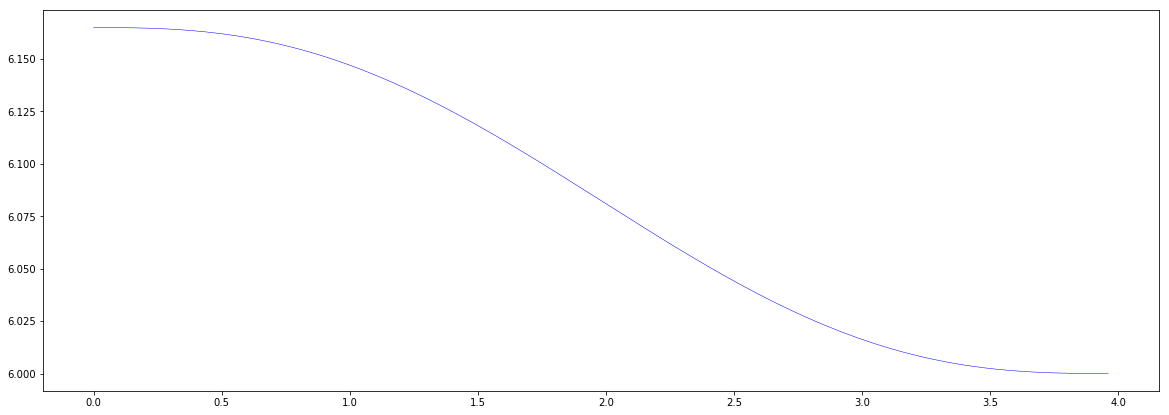

In [160]:
# plot d over t
plt.figure()
plt.plot(traj_df.t,traj_df.d,linewidth=.5,color='b')
plt.show()

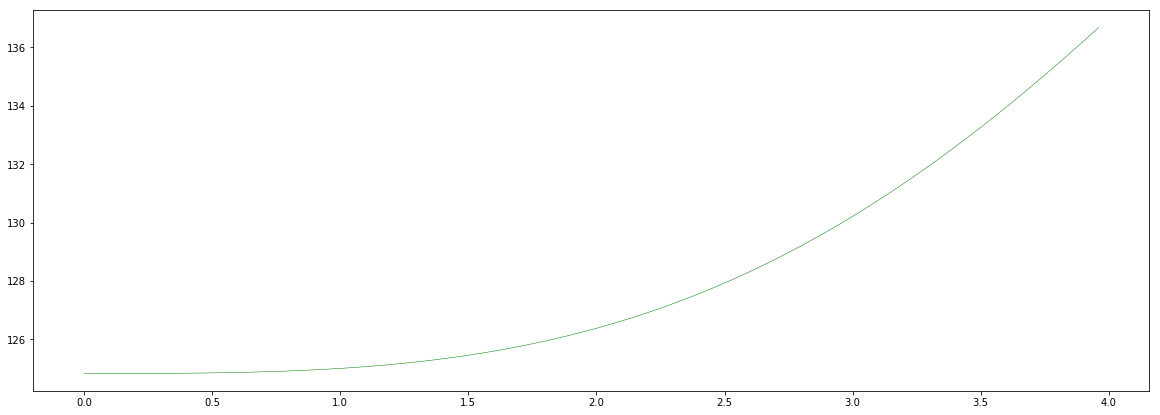

In [161]:
# plot s over t with velocity
plt.figure()
plt.plot(traj_df.t,traj_df.s,linewidth=.5,color='g')
plt.show()

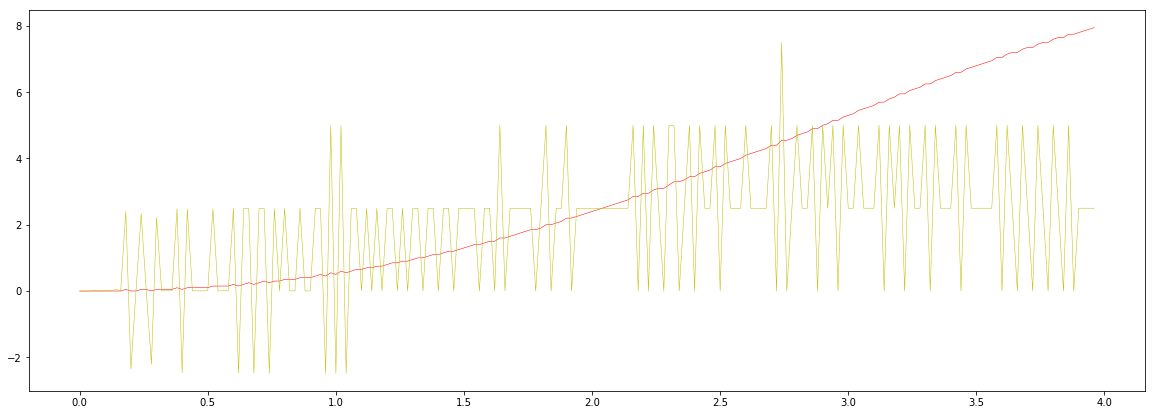

In [162]:
# plot velocity and acceleration over t 
plt.figure()

plt.plot(traj_df.t,traj_df.v,linewidth=.5,color='r')
plt.plot(traj_df.t,traj_df.a,linewidth=.5,color='y')
plt.show()